In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


###### BITMEX XBTUSDT ORDER BOOK OF 25 LEVELS

In [2]:
x = pd.read_csv("bitmex_book_snapshot_25_2020-09-01_XBTUSD.csv")

In [3]:
for i in range(25):
    L = str(i)
    VA =  x["asks["+L+"].price"] * x["asks["+L+"].amount"]
    VB =  x["bids["+L+"].price"] * x["bids["+L+"].amount"]
    x["I" + L] = ( VB - VA ) / ( VB + VA )

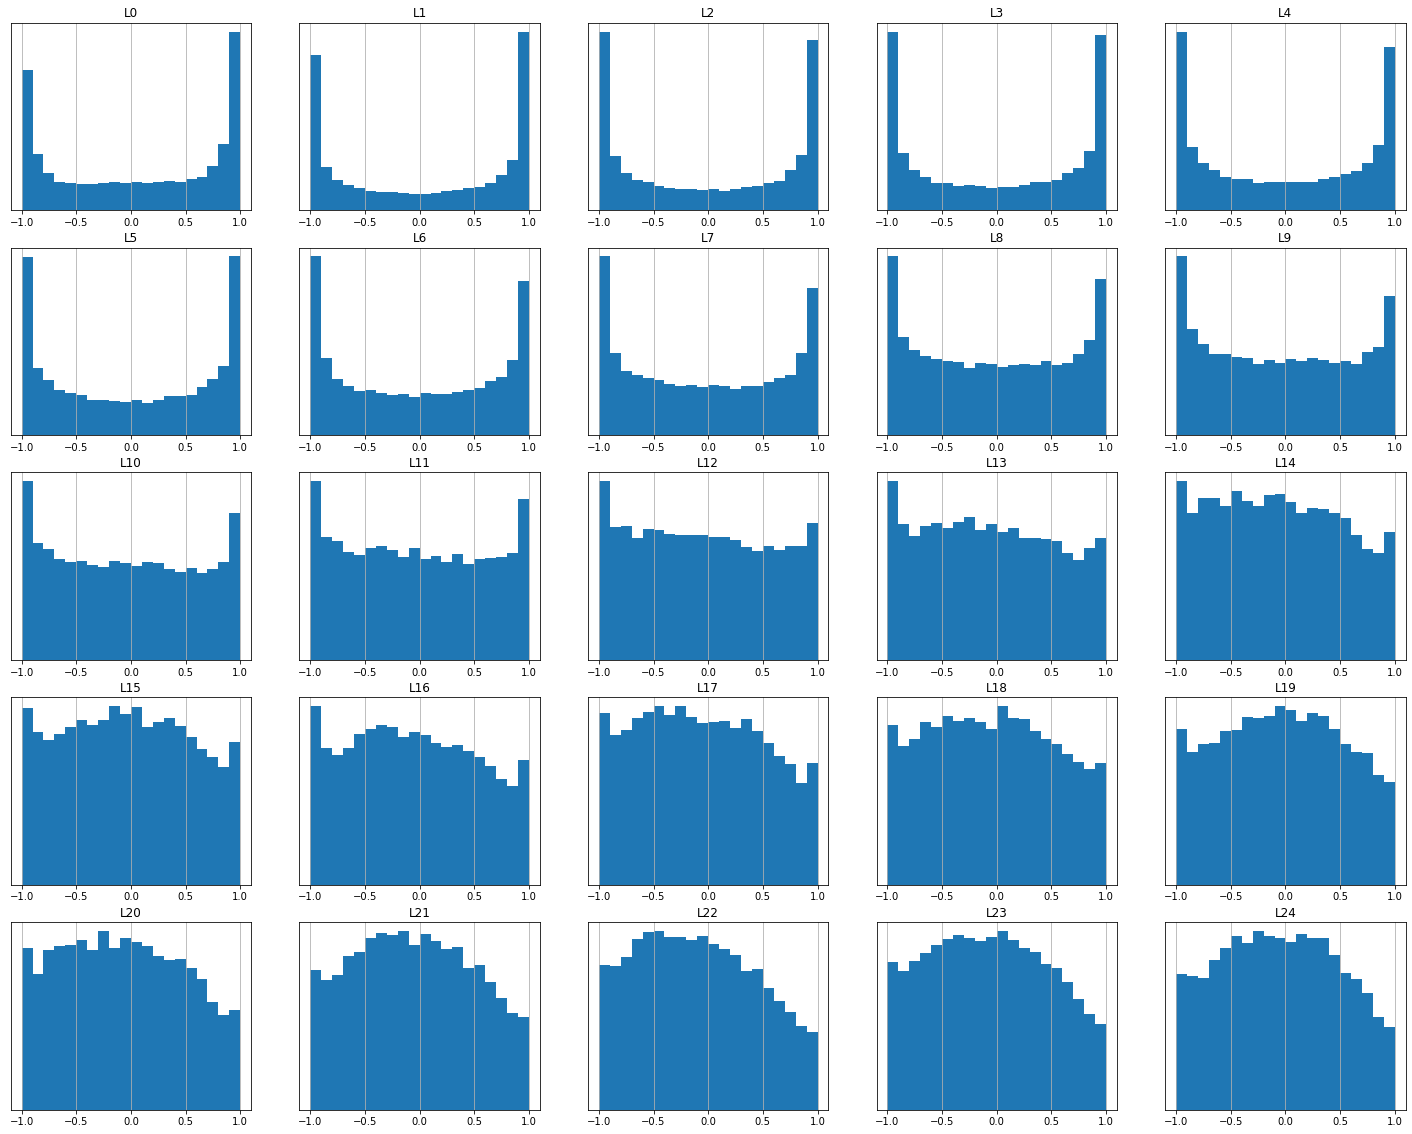

In [50]:
cols = x.columns[-25:]
plotn = 0
rows = 5
columns = 5
fig, ax_array = plt.subplots(rows, columns,squeeze=False)
fig.set_figheight(20)
fig.set_figwidth(25)
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title(cols[plotn])
        x["I" + str(plotn)].hist(bins = 20, ax = axes)
        axes.set_yticks([])
        axes.set_title("L" + str(plotn))
        plotn = plotn + 1
plt.show()

https://github.com/sstoikov/microprice/blob/master/Microprice%20-%20Big%20Data%20Conference.ipynb

In [81]:
xx = x.copy()
xx = xx.iloc[:, list(range(2, 8))]
xx = xx.rename({"asks[0].price": "askprice", "asks[0].amount": "asksize", "bids[0].price": "bidprice", "bids[0].amount": "bidsize"}, axis = 1)

In [82]:
xx["imbalance"] = xx.bidsize / (xx.bidsize + xx.asksize)
xx["midprice"] = (xx.askprice + xx.bidprice)/2
xx["weighted_midprice"] = xx.bidprice*(1 - xx.imbalance) + xx.askprice*xx.imbalance
xx["spread"] = xx.askprice - xx.bidprice
xx

,timestamp,local_timestamp,askprice,asksize,bidprice,bidsize,imbalance,midprice,weighted_midprice,spread
0,1598918402683390,1598918402683390,11658.0,1399982,11657.5,2293327,0.620941,11657.75,11657.810471,0.5
1,1598918403222279,1598918403222279,11658.0,1399982,11657.5,2293327,0.620941,11657.75,11657.810471,0.5
2,1598918403227183,1598918403227183,11658.0,1399982,11657.5,2293327,0.620941,11657.75,11657.810471,0.5
3,1598918403229039,1598918403229039,11658.0,1399982,11657.5,2293327,0.620941,11657.75,11657.810471,0.5
4,1598918403229829,1598918403229829,11658.0,1399982,11657.5,2293327,0.620941,11657.75,11657.810471,0.5
...,...,...,...,...,...,...,...,...,...,...
4382988,1599004799932409,1599004799932409,11937.0,1561539,11936.5,375476,0.193843,11936.75,11936.596921,0.5
4382989,1599004799957989,1599004799957989,11937.0,1561539,11936.5,379588,0.195550,11936.75,11936.597775,0.5
4382990,1599004799964256,1599004799964256,11937.0,1561539,11936.5,379588,0.195550,11936.75,11936.597775,0.5
4382991,1599004799977311,1599004799977311,11937.0,1561539,11936.5,379588,0.195550,11936.75,11936.597775,0.5


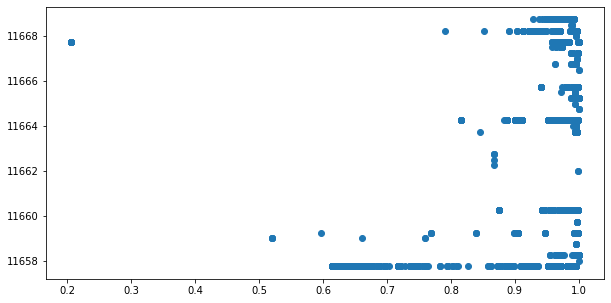

In [105]:
n = 5000
plt.figure(figsize=(10, 5))

plt.scatter(xx.head(n).imbalance, xx.head(n).midprice)

<AxesSubplot:>

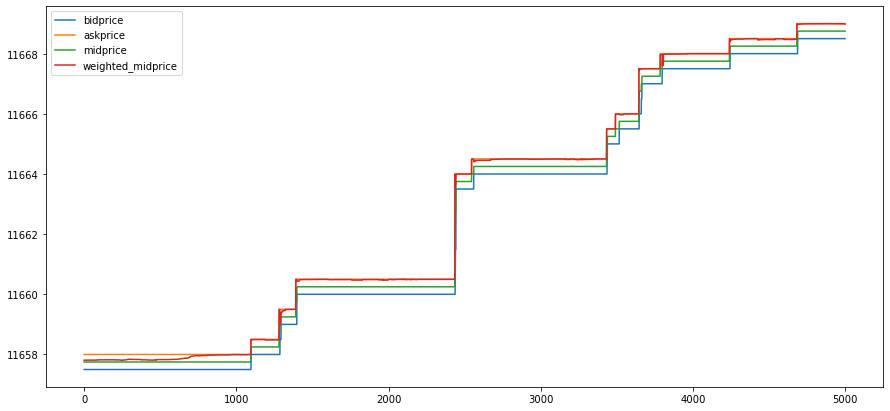

In [106]:
xx.head(n)[['bidprice','askprice','midprice','weighted_midprice']].plot(figsize = (15, 7))

<AxesSubplot:>

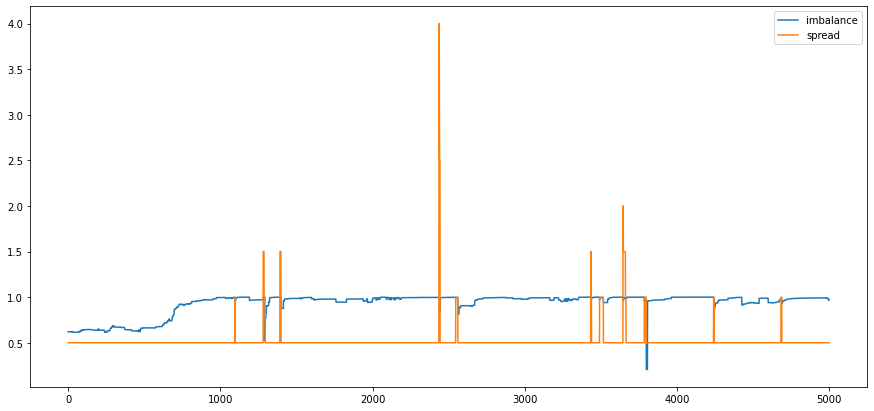

In [111]:
xx.head(n)[['imbalance','spread']].plot(figsize = (15, 7))

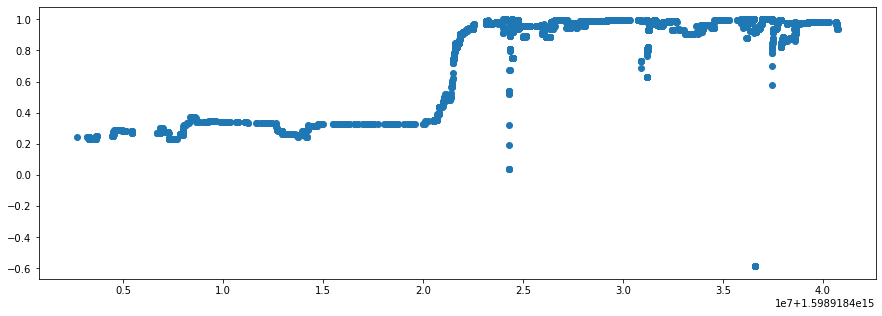

In [107]:
temp = x.head(n)
plt.figure(figsize=(15, 5))
plt.scatter(temp.timestamp, temp.I0)

<AxesSubplot:>

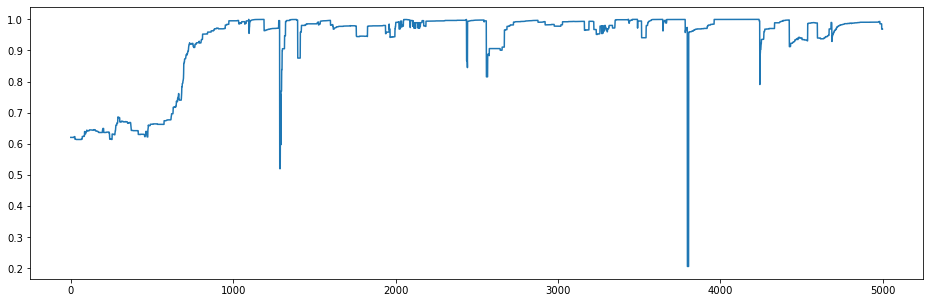

In [110]:
xx.head(n).imbalance.plot(figsize = (16, 5))